# Projection and Least Squares tutorial
 
This tutorial will guide you through the basics of linear projections and their relation to least squares. And in particular the following topics will be covered:
* Orthogonal Projection 
* Least Squares
* Linear regression


The necessary packages for the tutorial is loaded.

In [2]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Projections

Recall from the reading material that a orthogonal projection is a transformation that maps vectors onto a subspace in such that the distances between original and projected points are minimised. 


Consider the following example:

Define a set of points $\{x_1, \dots, x_n\} \in \mathbb{R}^2$ (`points` in the code) and a line $y=0.5x$ denoted $\mathcal{l}$. The task is to project the points $\{x_1, \dots, x_n\}$ onto $\mathcal{l}$:

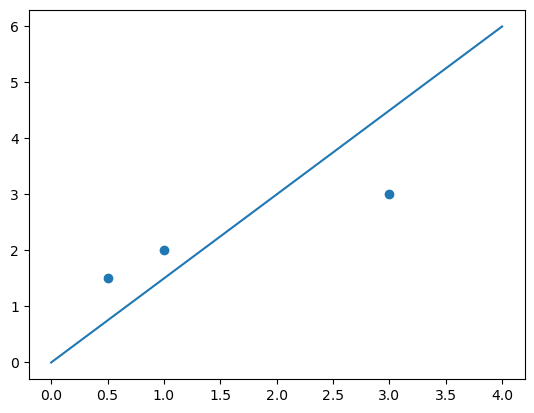

In [3]:
# Three points
points = np.array([
    [1, 2],
    [0.5, 1.5],
    [3, 3]
])

# Show plot
plt.scatter(points[:, 0], points[:, 1])

# Make line points (remember Numpy broadcasting)
x = np.linspace(0, 4)
y = x*1.5

# Plot line
plt.plot(x, y);

The points are projected onto the line $\mathcal{l}$ by multiplying each point $x_i$ with the projection matrix $P$, i.e. $x^{\prime}_i = Px_i$. The resulting points $x^{\prime}_i$ should then be "on" the line $\mathcal{l}$. Let's try to accomplish exactly this by implementing the procedure in code. **Note** It can be done for all points at once with $X^{\prime}=PX$ , where $X$ is the matrix with a point $x_i$ in each column. 

The projection matrix $P$ is determined using the formula:
$$
\begin{align}
P = A(A^TA)^{-1}A^T
\end{align}
$$
Matrix $A$, The "Design matrix", is a collection of column vectors that represent the subspace we want to project the point $x^{\prime}_i$ onto.
Notice from the formula that the _Norm_ of the $A$ has no importance to the projected point. The the column space spanned by the matrix (single vector in 1D ) is all that matters. 

The line $\mathcal{l}$ can therefore represented as a matrix (single vector since 1D) $A$. From $y=0.5x$ we get the matrix $\mathcal{l} = [1, 0.5]^\top$. In this case the projection matrix can then be found as:

In [4]:
#The line l written as the design matrix
l = np.array([[1, 1.5]]).T #  has to be a column vector
print(l.shape)
## construct projection matrix
P = l.dot(np.linalg.inv((l.T.dot(l))).dot(l.T))

(2, 1)


We now perform the projection itself ($\hat{x}_i = Px_i$):

In [5]:
#projection the points with matrix multiplication
x_prime = P.dot(points.T)
x_prime

array([[1.23076923, 0.84615385, 2.30769231],
       [1.84615385, 1.26923077, 3.46153846]])

The projection is verified by visualizing the original and projected points as well as the line:

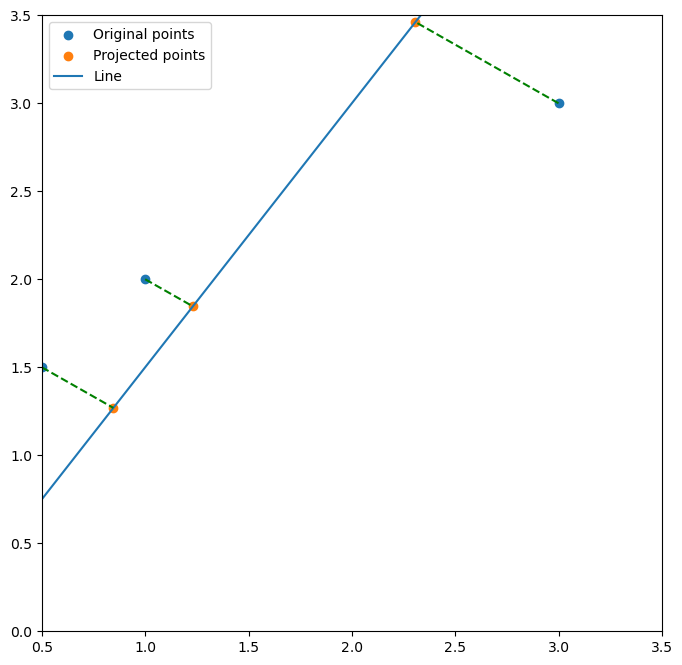

In [6]:
# Creating a square figure (makes it easier to visually confirm projection)
plt.figure(figsize=(8, 8))

# Plot everything

plt.scatter(points[:, 0], points[:, 1],label = "Original points") # Old points
plt.scatter(x_prime[0, :], x_prime[1, :],label = "Projected points") # Projected points
plt.plot(x, y, label = "Line") # Line
plt.legend()

# Gather old and projected points in a single array
P1 = np.concatenate([points[:,:].reshape(1,3,2),x_prime.T[:,:].reshape(1,3,2)],axis=0)
# Plot projection/error lines
plt.plot(P1[:,0,0],P1[:,0,1],'g--')
plt.plot(P1[:,1,0],P1[:,1,1],'g--')
plt.plot(P1[:,2,0],P1[:,2,1],'g--')

# Set axes limits to be the same for equal aspect ratio
plt.xlim(0.5, 3.5)
plt.ylim(0, 3.5);




**Notice:**
1. The projections lines (dashed lines) and the $\mathcal{l}$ line are orthogonal. 
2. It is straight forward to extend the projection to a vector space of higher dimension:
    *  Expanding the dimension of original vectors space by 1 $\rightarrow$ adding 1 more element to the column vectors of the design matrix $A$.
    *  Expanding the dimension of subspace (points are projected onto) by 1 $\rightarrow$ adding 1 more (independent!) column vector to the design matrix.
3. A projection is always project from a higher dimensional space onto a lower one. 
4. When applying projections, the resulting vectors are described in the original vector space, e.g. in this example above both the original and projected points are in $\mathbb{R}^2$. Often we are only interested in the points expressed in the subspace, called $x_{sub}$. In this case $x_{sub}$ is simply a scaler. The points in the original vectorspace is found by mulitplying $x_{sub}$ with the design matrix $A$. Hence mathematically, $x_i^{\prime}=Ax_{sub}$ and since $x_i^{\prime} = A(A^TA)^{-1}A^T x_i = Ax_{sub}$. It follows that $x_{sub} =(A^TA)^{-1}A^Tx_i$ is the formula to recover the points expressed in the dimension of the subspace.

It is intuitive to think of $x_{sub}$ as coordinates. Each coordinate tells you how for to go along a certain direction. With each direction being a coloum vectors of the design matrix.

## Least squares
Later in the course, projections are going to be used for other purposes, but for now the primary purpose is fitting linear models. A *linear model* is just a linear function (i.e. anything you can express with matrix operations) but using the term *model* makes it clear that our aim is to optimise it somehow for some purpose.

For now, we focus on a simple two-dimensional case. As in the video lecture from the week on transformations, we have three points that don't quite fit a line perfectly:

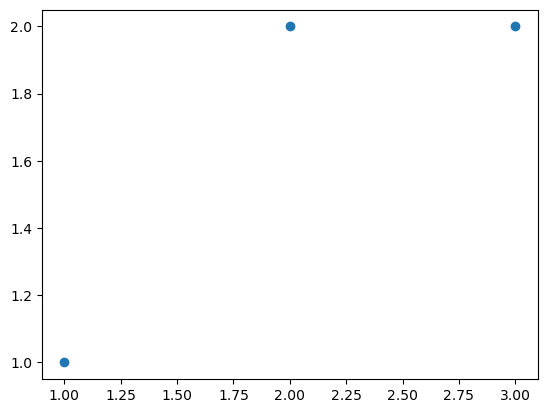

In [7]:
points = np.array([
    [1, 1],
    [2, 2],
    [3, 2]
])
plt.scatter(points[:, 0], points[:, 1]);

We want to end up with a line that minimises some form of error, i.e. a best fitting line. This does, however, require us to look a bit differently on the problem than we did previously. In the previous section we projected a set of points onto an existing line. Now, we want to find a line that minimises the error of projecting the points onto it. The heart of the problem is the linear equation

$$
Ax = b
$$

Here, $x$ is the unknown and represents a line. This might be confusing because $x$ represented points in the previous section. Another way to understand this is that for a linear function of the form $f(x) = a*x + b$, we may write this in matrix form as either $[a, b]\binom{x}{1} = y$ or $[x, 1]\binom{a}{b} = y$. In other words we may either view the function in terms of the variables $x, y$ or the parameters $a, b$. Because we are fitting a line, we want to find the parameters $a, b$ given a number of already provided $(x, y)$ points. Writing out the full equation therefore gives us: 

$$
\left[\begin{array}{cc}x_1 & 1\\\vdots & \vdots \\x_n&1\end{array}\right] \binom{a}{b} = \mathbf{y} = \left[\begin{array}{c}y_1\\ \vdots \\y_n\end{array}\right]
$$

where $a, b$ are the unknown parameters we want to find. The $1$'s column is what allows this compact notation - it ensures that $b$ is treated as constant. Now, $A$'s column vectors are each elements of $R^n$ but only span a plane ($R^2$) in this space. This space represents all possible valid lines. Since $\mathbf{y}$ might not be placed on this plane, we cannot solve the equations directly.

As demonstrated in the book and lectures, we first have to project $\mathbf{y}$ onto the plane spanned by $A$. This leads to a new equation $A\hat{x}=\hat{\mathbf{y}}$ which **can** be solved using inverses. 


### Starting out
We start by creating the matrix $A$ (still called the **Design Matrix**):

In [8]:
x_vals = points[:, 0]
y_vals = points[:, 1]

X = np.vstack((x_vals, np.ones(x_vals.shape))).T
X

array([[1., 1.],
       [2., 1.],
       [3., 1.]])

### Projection
Instead of transforming the line parameters $\hat{x}$ back into $R^n$ when projecting ($n$ is from the design matrix which has $n$ rows, one for each point), we use the same method you were tasked with implementing in the last section. This gives the equation: $\hat{x} = (A^TA)^{-1}A^T \mathbf{\hat{y}}$ , same as explained in the projection section but with a slightly different notation:

In [9]:
# Creating the matrix
Pm = np.linalg.inv(X.T.dot(X)).dot(X.T)

Pm_y = X.dot(np.linalg.inv(X.T.dot(X)).dot(X.T))
Pm_y2 = Pm_y.dot((np.linalg.inv(X.T.dot(X)).dot(X.T)).T)

# Applying the transformation
params = Pm.dot(points[:, 1])

In [10]:
v1 = X[:,0]
v2 = X[:,1]


Now we want to visualise the resulting line. The `params` vector is of the form $(a, b)$ and the line formula is $f(x)=ax+b$. Below, we calculate a number of points on the line for visualisation purposes and compare with both the original and projected points:

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]


Text(0.5, 1.0, 'Least squares linear regression 3 points')

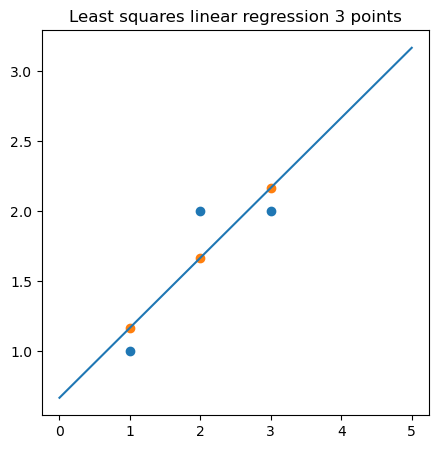

In [11]:
## Comment out to get windowed 'viewpoint changeable' plots
#import matplotlib
#matplotlib 

x = np.linspace(0, 5) # Create range of values
y = x*params[0] + params[1] # Calculate f(x)

plt.figure(figsize=(5,5))

plt.plot(x, y) # Plot line
plt.scatter(points[:, 0], points[:, 1]) # Plot original points

y_hat = X.dot(params) # Project original points onto the line (like in the last section)
plt.scatter(points[:, 0], y_hat); # Plot the points
plt.title('Least squares linear regression 3 points')

This looks promising. Only the y-positions have moved and the resulting line looks reasonably optimal. However, we need to define some method of evaluating the quality of the fit in a quantitative manner.

Remember that both $\mathbf{y}$ and $\mathbf{\hat{y}}$ are vectors. The projection error vector is defined as $e = \mathbf{y}-\mathbf{\hat{y}}$. We use the length of this vector, denoted $||e||_2$, as our error measure. The full equation is:

$$
||e||_2 = \sqrt{\sum_{i=1}^n e_i^2} = \sqrt{\sum_{i=1}^n (y_i - \hat{y}_i)^2}
$$ 

We want to be able to compare errors from datasets of different sizes. We therefore modify the measure to use the averageI  squared error instead:

$$
f_{RMS}(\mathbf{y}, \mathbf{\hat{y}}) = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2}
$$

Let us start by calculating the error vector itself:

In [12]:
y_hat = X.dot(params)
e = y_vals-y_hat
e

array([-0.16666667,  0.33333333, -0.16666667])

And then find the $f_{RMS}$:

In [13]:
np.sqrt((e**2).mean())

0.23570226039551584

This completes our basic walkthrough of least squares. In the exercises you will implement least squares regression in practice for actual problems using high-level Python libraries...